In [5]:
import json
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from cycler import cycler
cm = plt.cm.tab10.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--', '-.']))
# for d in cycle:
#     print(d)
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 300

0000001101100 91.03999999999999 5225 5.225
0000001110100 90.82000000000001 945 0.9450000000000001
0000010011100 90.79 2620 2.62
0000010100000 90.98 4820 4.82
0000010101100 91.36 2507 2.5069999999999997
0000010110100 90.78 2301 2.3009999999999997
0000011001000 90.53 1546 1.546
0000011001100 90.53 1206 1.206
0000011010100 90.8 3652 3.6519999999999997
0000011011101 88.3 498 0.498
0000100011100 91.21000000000001 2540 2.54
0000100101100 91.44 1775 1.775
0000100110000 91.06 5892 5.892
0000100111101 87.85 567 0.567
0000101001000 90.73 3247 3.247
0000101010100 90.95 3743 3.743
0000101011101 89.4 769 0.769
0000101101101 89.12 606 0.606
0000110001100 89.94 1668 1.6680000000000001
0000110010100 90.01 1192 1.192
0000110011011 87.07000000000001 590 0.59
0000110110011 86.72 211 0.211
0000110110101 87.53 528 0.528
0001000011100 90.29 1225 1.225
0001000101100 90.95 3307 3.3070000000000004
0001000110100 90.94 3152 3.152
0001000111101 88.28 428 0.428
0001001001100 91.27 1435 1.435
0001001010000 90.75 43

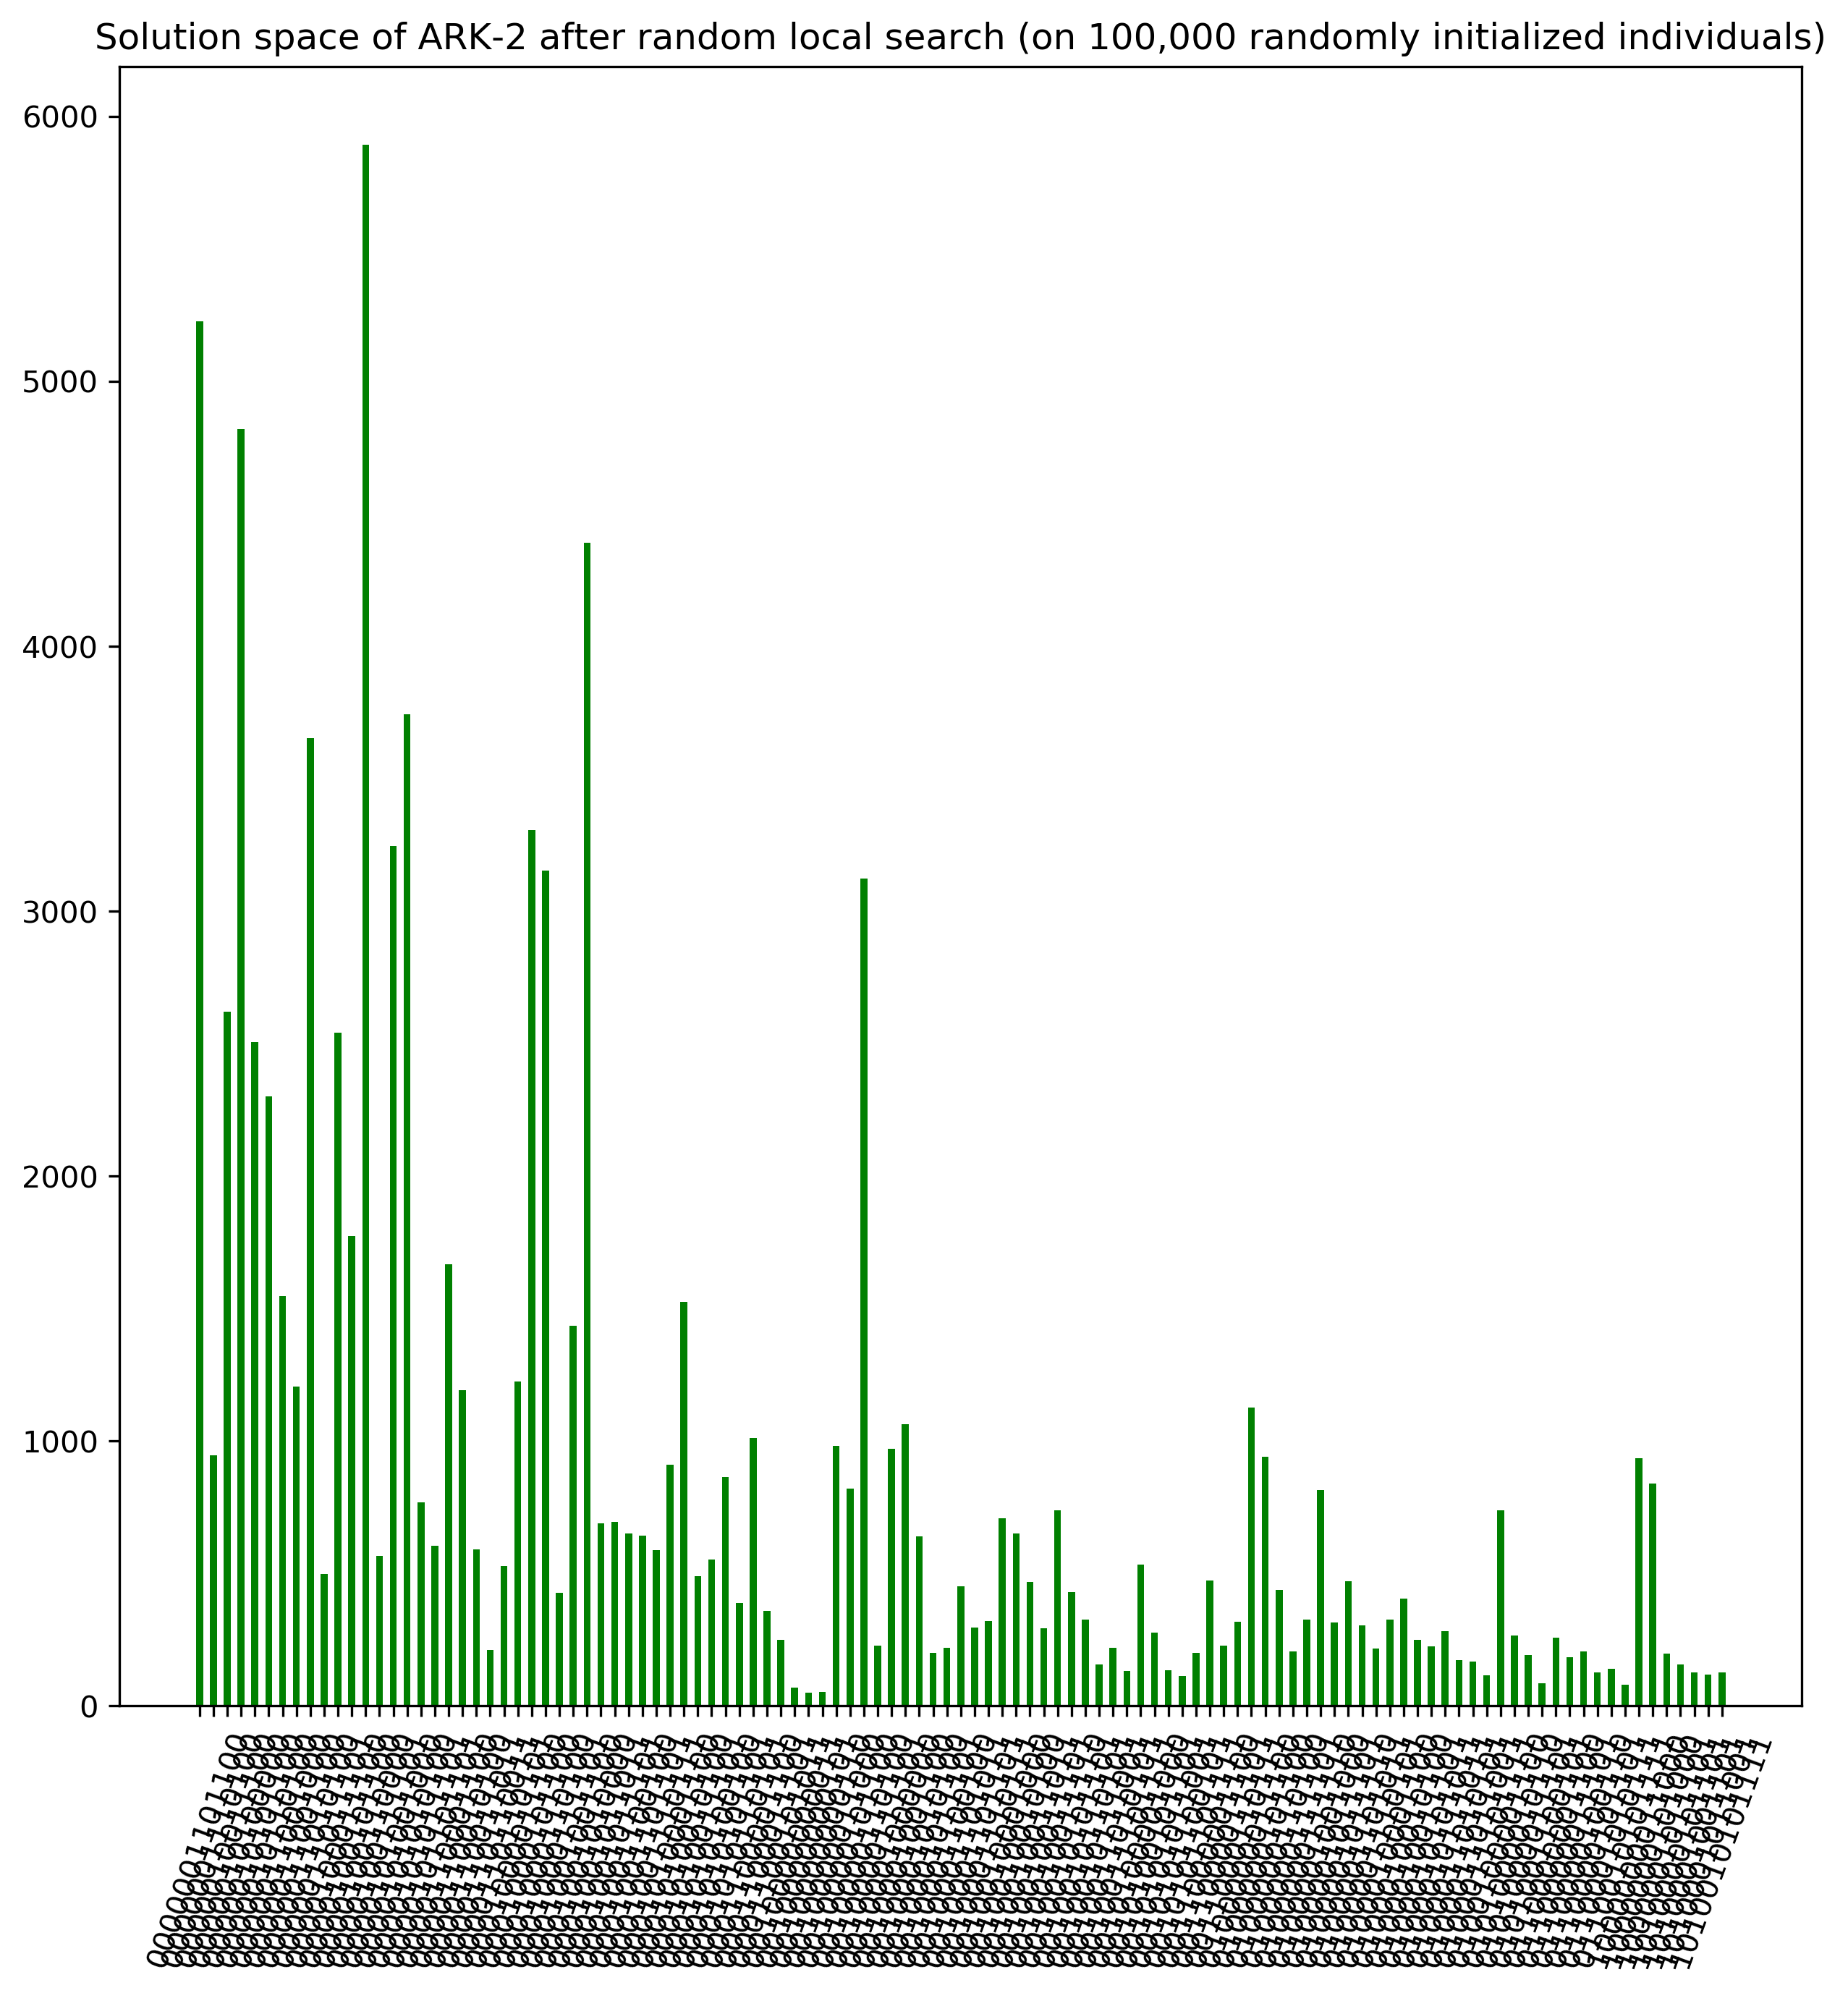

In [43]:
# Until 10000 absolute evaluations. Unique evaluations are also stored.
# Alphabet={0,1,2,3}.
filename = "../data/exp7/data_ark2_randomstart.json"

totalsum = 0
average = 0
total_entries = 100000

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
#     print(rawdata["finalSolutionSpace"])
    
    myDictionary = rawdata["finalSolutionSpace"]
#     print(myDictionary)
    for item in myDictionary:
        totalsum = totalsum + myDictionary[item]
        model_file_string = "../ark2/model_" + item + ".json"
        model_file_string = model_file_string.replace("3", "")
        with open(model_file_string) as model_file:
            model_info = json.load(model_file)
            value = model_info["val_acc_ensemble"][4]
            percentage = myDictionary[item] / total_entries * 100
            print(item, value, myDictionary[item], percentage)
            average = average + (myDictionary[item] / total_entries) * value
            
    width = 0.5
    plt.bar(myDictionary.keys(), myDictionary.values(), width, color='g')
    plt.xticks(rotation=70)
    plt.title("Solution space of ARK-2 after random local search (on 100,000 randomly initialized individuals)")
    
    print(totalsum)
    print("average", average)
